In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Part 1
1D Ising chain: spins with nearest-neighbor interactions

In [212]:
# Finds the total energy of a given 1D chain
def compute_energy(chain,J):
    #print(chain)
    i = 0
    E = 0.0    # total energy
    #J = 1.0
    n = chain.size
    while i < n:
        #print(chain[i], chain[i-1])
        E += -J*chain[i]*chain[i-1]
        i += 1
    #print(E)
    return E
# Flips a random spin of a given 1D chain
def rand_flip(chain):
    n = chain.size
    rand_ind = np.random.randint(0,n)
    chain[rand_ind] = -1*chain[rand_ind]
    return rand_ind


In [219]:
def main_1D(temperature):
    # Part 1
    # Thermal simulations of interacting spins on a 1D lattice using
    # Metropolis algorithm
    k = 1.38064852*10**-23
    T = temperature #273 #3*10.0**23
    kT = k*T #3.0
    J = 3.0 * kT   # units of kT, smaller, higher, near
                    # 3 is >> kT
    beta = 1./kT
    hfield = 0
    mu = 1.0
    
    n = 32    # Number of Spins
    chain = np.ones(n) #np.random.randint(2,size=n)
                #ones(n)    # 1D chain of N spins all aligned up
    for spin in range(0,n):
        if chain[spin] == 0.0:
            chain[spin] = -1.
    energies = np.array([compute_energy(chain,J)])
    #print(chain)
    
    eq = False
    iteration = 0
    max_iter = 2000
    acceptance = 0
    do_printout = False
    do_plot = False
    
    #Marr = np.zeros(n) # mu*sum of the average spins
    #Cv = 0 ##1./(kT**2) * (avg(E**2)+avg(E)**2)
    #m = np.sin(beta*hfield) / ((np.sin(beta*hfield))**2+np.exp(-4*J))**(.5)
    
    if do_plot:
        plt.show()
        plt.figure()
        
    while not eq: 
        ace = False
        E1 = compute_energy(chain,J)

        rand_ind = rand_flip(chain)
        E2 = compute_energy(chain,J)

        delta_E = E2 - E1

        if delta_E == 0.0:
            acceptance += 1
            ace = True
            energies = np.append(energies,E2)
        elif delta_E > 0:
            p = np.exp(-delta_E/kT)
            r = np.random.random()
            if r > p:
                chain[rand_ind] = -1*chain[rand_ind]
                energies = np.append(energies,E1)
            else:
                acceptance += 1
                ace = True
                energies = np.append(energies,E2)
        else: 
            acceptance += 1
            ace = True
            energies = np.append(energies,E2)

        #plt.subplot(212)
        #plt.plot(iteration,acceptance,'go')
        iteration += 1
        if iteration == max_iter:
            eq = True

        if do_printout:# and ace:
            print(chain)
            print('Iteration:', iteration+1)
            print('Total Energy 1:', E1)
            print('Total Energy 2:', E2)
            print('Change in Energy:', delta_E)
            print(acceptance)
            print()
        #Marr = np.add(Marr, chain)
        #print(np.sum(Marr))
    #Mag = mu*np.sum(np.divide(Marr,iteration))
    if do_printout:
        print('Acceptance Rate:', acceptance, 'acceptances in', iteration, 'iterations')
        #print('Average magnetization:',np.round(Mag,3))
        print(eq)
    #print(m)
    #print(np.sum(chain),n,chain)
    Mag = np.sum(chain)
    if do_plot:
        plt.plot(energies)
        plt.show()
    #print(Mag)
    return energies, Mag
    
##
# 1 run simulation 1000x iterations
# write down avg found energy
# run it again, repeat at one temperature
# repeat 1-3 at different temperatures
##

main_1D(273.)

print()

In [222]:
run_temp = 100
max_temp = 500#5000
arr_length = 50#int(max_temp/run_temp)
siz = 10 # number of energies to average over

temperatures = np.linspace(run_temp, max_temp, arr_length)
k = 1.38064852*10**-23
energies = np.zeros((arr_length,siz))
Cv = np.zeros(arr_length) ##1./(kT**2) * (avg(E**2)-avg(E)**2)
Mag = np.zeros(arr_length)

for i in range(0,temperatures.size):
    temp = temperatures[i]
    m = np.zeros(siz)
    for j in range(0,siz):
        en, m[j] = main_1D(temp)
        energies[i,j] = np.mean(en)
    Cv[i] = (1./(k*temp**2))*(np.mean(np.multiply(energies[i],energies[i])**2) - np.mean(energies[i]**2))
    Mag[i] = np.mean(m)
    
print()

-1.272405676032002e-19 -1.272405676032002e-19


Text(0, 0.5, 'Magnetization')

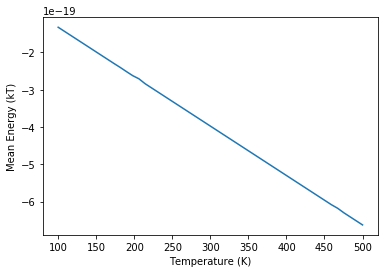

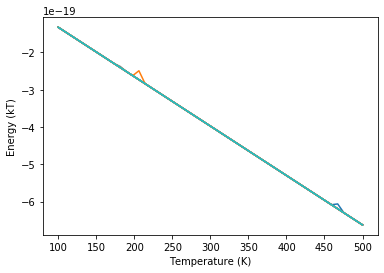

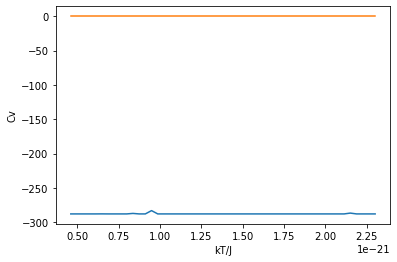

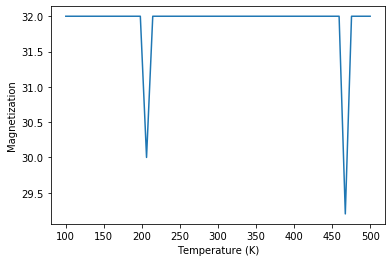

In [241]:
mean_energies = np.mean(energies, axis=1)
#J = 3.0*k*T

plt.figure(1)
plt.plot(temperatures,mean_energies)
plt.xlabel('Temperature (K)')
plt.ylabel('Mean Energy (kT)')

plt.figure(2)
plt.plot(temperatures,energies)
plt.xlabel('Temperature (K)')
plt.ylabel('Energy (kT)')

plt.figure(3)
# what I calculated for Cv
tes = np.multiply(Cv,1./(32.*k))
plt.plot(temperatures*k/3.0, tes)
# actual Cv
c_act = 32.*k*(3.0*k*temperatures/(k*temperatures))**2/np.cosh(3.0*k*temperatures/(k*temperatures))**2
plt.plot(temperatures*k/3.0, np.multiply(c_act,1./(32.*k)))
plt.xlabel('kT/J')
plt.ylabel('Cv')
print(Cv[25], Cv[26])

plt.figure(4)
plt.plot(temperatures, Mag)
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization')

#print(Cv)

Questions/Tasks:
1. Why, in eq. (1), are we not also considering $s_{i-1}$ when computing the energy, it is a nearest neighbor after all? Discuss.

We don't consider $s_{i-1}$ when computing the sum of the energy, because we are finding the individual energy between the two adjacent spins. The energy between $s_{i-1}$ and $s_i$ will have been computed when the sum was at i = i-1.

2. One generally chooses J>0.  What does that imply for the energetically favored orientation of nearest neighbors? Discuss. Explore what happens when you choose J<0.

J is the interaction energy between spins, and it is assumed that J > 0 if the neighbor spins are antiparallel and J < 0 if the neighbor spins are parallel. If J < 0 is chosen, then the sign of the total energy is flipped, and the system must decrease in energy to reach equilibrium rather than increase. 

3. How do you decide if and when the system has reached equilibrium? Discuss. 

The system has reached equilibrium once the energy has stopped changing substantially and starts to oscillate around a certain value. The energy will never really reach a certain value and stay there, as there continues to be random spin flips, but at equilibrium it will generally not stray far from there.

4. How does the acceptance rate evolve upon approaching equilibrium? Discuss. 

The acceptance rate is slightly lower before the system reaches equilibrium, but afterwards it is linear. 

5. For N=32 compute, plot and discuss the temperature dependence of equilibrium quantities of interest such as the energy $E$, the magnetization $M$ and the heat capacity $C$.  Note: although $C = \frac{dE}{dT}$,  taking the derivative numerically is something to be avoided (very noise sensitive).  Therefore, you may want to compute it by other means.  In presenting and discussing your results, be clear about the initial conditions you chose, your requirements for equilibrium, the temperature, and value of J, etc. 



6. Finally, take a case for which  J=3kT (low temperature case) and start with randomized spin orientations. Compute the magnetization at equilibrium.  The magnetization as found analytically is given by: 
$m = \frac{sin(\beta H)}{(sin^2(\beta H)+e^{-4 \beta J})^{1/2}}$
and equals 0 so long no external field is applied (H=0).  Only at T=0 does the 1D Ising model become ferromagnetic, that is, has it m!=0 when H=0. How does that compare to your simulation? How well does your simulation capture low temperature behavior? Is the Metropolis algorithm (acceptance rate) very efficient at low temperatures?  Discuss.   


## Part 2
The 2D Ising Model

In [ ]:
#kT = 1.0
beta = 1.0#/kT

# from markov-ising algorithm 5.7
def markovIsing(spins, E):
    k = np.random.randint(0,spins.size)
    ## for 2D will need to find 2 randint
    h = 0 ## unsure what this is summing exactly
    delE = 2*h*spins[k]
    gamma = np.exp(-beta*delE)
    r = np.random.random()
    if r < gamma:
        spins[k] = -1*spins[k]
        E = E + delE
    return spins, E

# from heatbath-ising algorithm 5.8
def heatbathIsing(spins, E):
    k = np.random.randint(0,spins.size)
    ## for 2D will need to find 2 randint
    h = 0 ## unsure what this is summing exactly
    delE = 2*h*spins[k]
    spinPrime = spins[k]
    gamma = np.random.random()
    piPlusH = 1 / (1 + np.exp(-2*beta*h))
    if gamma < piPlusH:
        spins[k] = 1.
    else:
        spins[k] = -1.
    if spinPrime != spins[k]:
        E = E-2*delE
    return spins, E

# from cluster-ising algorithm 5.9
def clusterIsing(spins):
    j = np.random.randint(0,spins.size)
    C = np.array([j])
    prob = np.array([j])
    p = 1 - np.exp(-2*beta)
    while prob != 0:
        k = np.random.randint(0,prob.size)
        # for all l excluding C
        # with neighbor of k
        # and spins[l] = spins[k]
        ## get help figuring out how
        for l in prob:
            r = np.random.random()
            if r < p:
                prob = np.append(prob,l)
                C = np.append(C,l)
        prob = prob / {k}   ## I think this has a different meaning 
                            ## from what I think
    for k in C:
        spins[k] = -1*spins[k]
    return spins

In [ ]:
### Main for 2D Ising Chain Model
def main_2D():

    N = 10    # Number of Spins
    M = 10
    chain = np.ones((M,N))      # 2D chain of N spins all aligned up
                                # size MxN
    energies = np.array([compute_energy(chain)])
    #print(chain)
    k = 1.38064852*10**-23 # m2 kg s-2 K-1
    T = 100 # K
    kT = 10 #k*T #10  # easier to set to 10 than a physical value test
    J = 1    # units of kT
    eq = False # equilibrium condition
    iteration = 0 # count of iterations
    max_iter = 1500 # maximum number of iterations
    acceptance = 0 # keep track of num. of acceptances
    do_printout = False # set to True if you want all the prints
    plt.show()

main_2D()